In [40]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [41]:
X_train = np.array([1, 2])
y_train = np.array([300, 500])

In [42]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    sum = 0
    total_cost = 0
    for i in range(0, m):
        f_wb = w*x[i] + b
        sum = sum + (f_wb - y[i])**2
    total_cost = sum / (2*m)
    return total_cost

In [70]:
def compute_gradient(x, y, w, b):
    dj_dw = 0
    dj_db = 0
    m=x.shape[0]
    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw = dj_dw + (f_wb - y[i]) * x[i]
        dj_db = dj_db + (f_wb - y[i])
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [78]:
def gradient_descent(x, y, w_in, b_in, alpha, n_of_iter, compute_cost, compute_gradient):
    j_hist=[]
    p_hist=[]
    b = b_in
    w = w_in
    w = copy.deepcopy(w_in)
    for i in range(n_of_iter):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        if(i<100000):
            j_hist.append(compute_cost(x, y, w, b))
            p_hist.append([w, b])
        if i% math.ceil(n_of_iter/10) == 0:
            print(f"Iteration {i:4}: Cost {j_hist[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, j_hist, p_hist

In [80]:
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(X_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

 

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


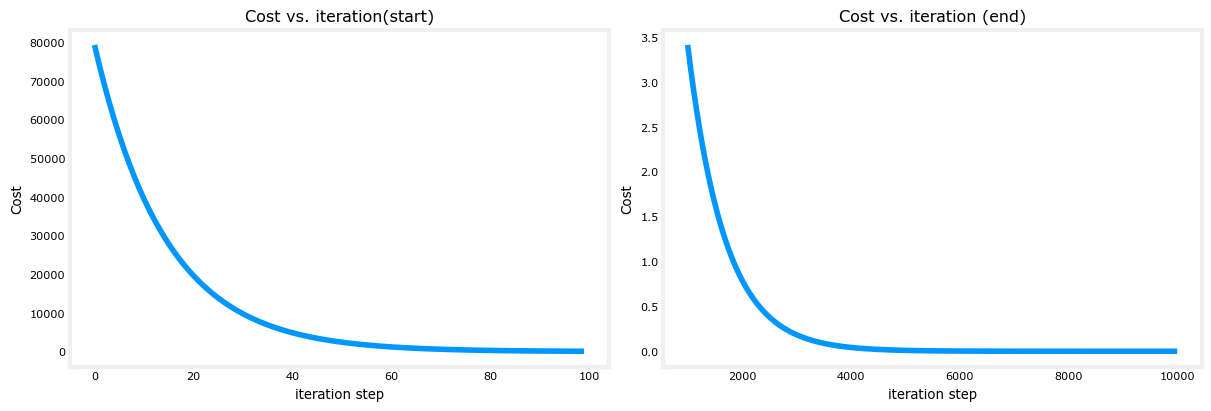

In [82]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()